In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import tree

In [2]:
data=pd.read_csv("loan-train.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data["Gender"].fillna(data["Gender"].mode()[0], inplace=True)
data["Married"].fillna(data["Married"].mode()[0], inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0], inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0], inplace=True)
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0], inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0], inplace=True)

In [9]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


<AxesSubplot:>

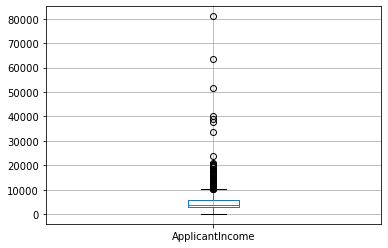

In [11]:
data.boxplot(column='ApplicantIncome')

<AxesSubplot:>

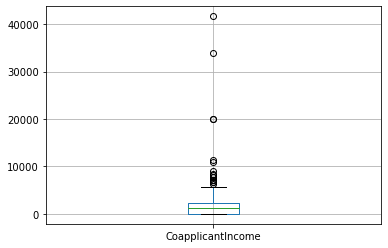

In [12]:
data.boxplot(column='CoapplicantIncome')

<AxesSubplot:>

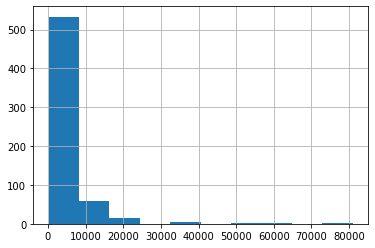

In [13]:
data['ApplicantIncome'].hist()

<AxesSubplot:>

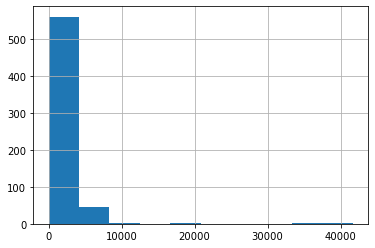

In [14]:
data['CoapplicantIncome'].hist()

<AxesSubplot:>

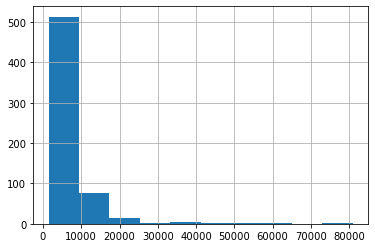

In [15]:
data["Total_Income"]=data["ApplicantIncome"]+data["CoapplicantIncome"]
data["Total_Income"].hist()

<AxesSubplot:>

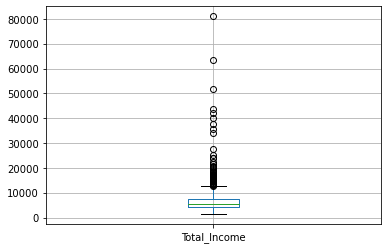

In [16]:
data.boxplot(column='Total_Income')

<AxesSubplot:>

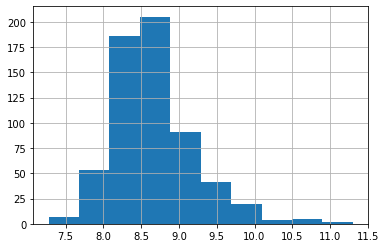

In [17]:
data["Total_Income_Log"]=np.log(data["Total_Income"])
data["Total_Income_Log"].hist()

<AxesSubplot:>

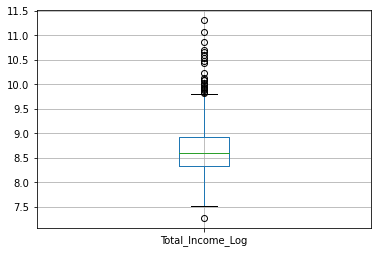

In [18]:
data.boxplot(column='Total_Income_Log')

<AxesSubplot:>

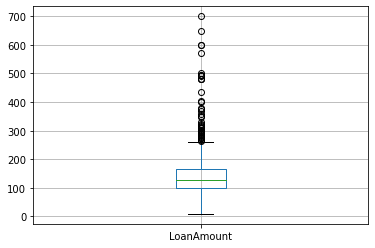

In [19]:
data.boxplot(column="LoanAmount")

<AxesSubplot:>

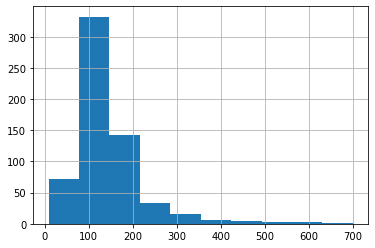

In [20]:
data['LoanAmount'].hist()

<AxesSubplot:>

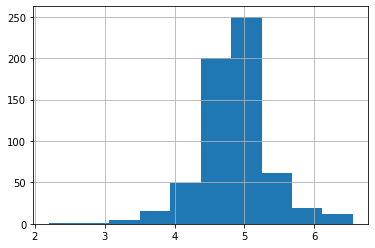

In [21]:
data["Loan_Amount_Log"]=np.log(data["LoanAmount"])
data["Loan_Amount_Log"].hist()

<AxesSubplot:>

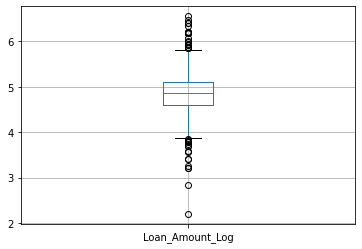

In [22]:
data.boxplot(column="Loan_Amount_Log")

In [23]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_Log,Loan_Amount_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,4.986426
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.714568,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760


In [24]:
X=data.iloc[:,np.r_[1:5,9:11,13,15]].values
X[0]

array(['Male', 'No', '0', 'Graduate', 360.0, 1.0, 5849.0,
       4.986425672954842], dtype=object)

In [25]:
y=data.iloc[:,12].values
y[0:5]

array(['Y', 'N', 'Y', 'Y', 'Y'], dtype=object)

In [26]:
enc=LabelEncoder()

In [27]:
for i in range (0,4):
    X[:,i]=enc.fit_transform(X[:,i])

In [28]:
y[:]=enc.fit_transform(y[:])
y=y.astype('int')

In [29]:
X_trn, X_tst, y_trn, y_tst = train_test_split(X,y,train_size=0.8,random_state=0)

In [30]:
X_trn

array([[1, 1, 0, ..., 1.0, 5858.0, 4.875197323201151],
       [1, 0, 1, ..., 1.0, 11250.0, 5.278114659230517],
       [1, 1, 0, ..., 0.0, 5681.0, 5.003946305945459],
       ...,
       [1, 1, 3, ..., 1.0, 8334.0, 5.298317366548036],
       [1, 1, 0, ..., 1.0, 6033.0, 5.075173815233827],
       [0, 1, 0, ..., 1.0, 6486.0, 5.204006687076795]], dtype=object)

In [31]:
X_tst[0]

array([1, 0, 0, 0, 360.0, 1.0, 7085.0, 4.430816798843313], dtype=object)

In [32]:
y_trn

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [33]:
y_tst

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [34]:
s=StandardScaler()

In [35]:
X_trn=s.fit_transform(X_trn)
X_tst=s.fit_transform(X_tst)

In [36]:
X_trn[0]

array([ 0.47374983,  0.71143163, -0.76304669, -0.53102197,  0.26983787,
        0.41790088, -0.18578759,  0.02443538])

In [37]:
dtree = DecisionTreeClassifier()

In [38]:
dtree = dtree.fit(X_trn, y_trn)

In [39]:
y_check=dtree.predict(X_tst)

In [40]:
y_check

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [41]:
print("Accuracy for Decision Tree Algorithm =",metrics.accuracy_score(y_tst,y_check))
print("Precision for Decision Tree Algorithm =",metrics.precision_score(y_tst,y_check))
print("Recall Score for Decision Tree Algorithm =",metrics.recall_score(y_tst,y_check))
print("F1 Score for Decision Tree Algorithm =",metrics.f1_score(y_tst,y_check))

Accuracy for Decision Tree Algorithm = 0.6260162601626016
Precision for Decision Tree Algorithm = 0.8333333333333334
Recall Score for Decision Tree Algorithm = 0.6111111111111112
F1 Score for Decision Tree Algorithm = 0.7051282051282051


[Text(109.4090625, 213.0912, 'X[5] <= -0.988\ngini = 0.438\nsamples = 491\nvalue = [159, 332]'),
 Text(70.74000000000001, 204.3936, 'X[7] <= 2.838\ngini = 0.128\nsamples = 73\nvalue = [68, 5]'),
 Text(66.42, 195.696, 'X[7] <= 0.407\ngini = 0.105\nsamples = 72\nvalue = [68, 4]'),
 Text(53.46, 186.9984, 'X[7] <= -0.014\ngini = 0.036\nsamples = 55\nvalue = [54, 1]'),
 Text(49.14, 178.3008, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]'),
 Text(57.78, 178.3008, 'X[7] <= 0.024\ngini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(53.46, 169.60320000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(62.1, 169.60320000000002, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(79.38000000000001, 186.9984, 'X[6] <= -0.013\ngini = 0.291\nsamples = 17\nvalue = [14, 3]'),
 Text(75.06, 178.3008, 'X[2] <= -0.269\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(70.74000000000001, 169.60320000000002, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(79.38000000000001, 169.60320000000002, 'gini = 

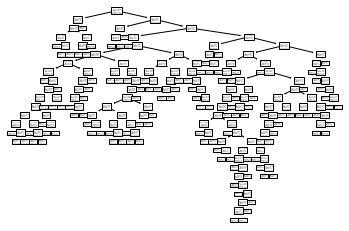

In [42]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_trn, y_trn)
tree.plot_tree(clf)

In [43]:
NBC=GaussianNB()

In [44]:
NBC=NBC.fit(X_trn, y_trn)

In [45]:
y_check=NBC.predict(X_tst)

In [46]:
y_check

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [47]:
print("Accuracy for Naive Bayes Algorithm =",metrics.accuracy_score(y_tst,y_check))
print("Precision for Naive Bayes Algorithm =",metrics.precision_score(y_tst,y_check))
print("Recall Score for Naive Bayes Algorithm =",metrics.recall_score(y_tst,y_check))
print("F1 Score for Naive Bayes Algorithm =",metrics.f1_score(y_tst,y_check))

Accuracy for Naive Bayes Algorithm = 0.8373983739837398
Precision for Naive Bayes Algorithm = 0.8301886792452831
Recall Score for Naive Bayes Algorithm = 0.9777777777777777
F1 Score for Naive Bayes Algorithm = 0.8979591836734695
